In [2]:
import pandas as pd
import os

#### Merging 12 months of sales data into a single file.

In [3]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()


for file in files: 
    df = pd.read_csv("./Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index=False)

In [4]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


#### Clean up the data

##### Drop rows of nan

In [5]:
all_data = all_data.dropna(how='any')

In [6]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"
...,...,...,...,...,...,...
186845,236665,Wired Headphones,1,11.99,07/20/19 16:16,"694 Meadow St, Atlanta, GA 30301"
186846,236666,20in Monitor,1,109.99,07/31/19 20:11,"866 14th St, San Francisco, CA 94016"
186847,236667,AAA Batteries (4-pack),1,2.99,07/17/19 22:29,"249 Cherry St, Dallas, TX 75001"
186848,236668,Wired Headphones,1,11.99,07/30/19 19:28,"727 Wilson St, Austin, TX 73301"


#### Augment data with additional columns

In [11]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month']  = all_data['Month'].astype('int32')
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",2
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",2
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",2
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",2


#### Analysis 1: Best month for sales, and money earned that month.

In [46]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data["Sales"] = pd.to_numeric(all_data["Sales"])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,150502,iPhone,1,700.000000,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2,700.000000
1,150503,AA Batteries (4-pack),1,3.839844,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",2,3.839844
2,150504,27in 4K Gaming Monitor,1,390.000000,02/18/19 09:46,"52 6th St, New York City, NY 10001",2,390.000000
3,150505,Lightning Charging Cable,1,14.953125,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",2,14.953125
4,150506,AA Batteries (4-pack),2,3.839844,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",2,7.679688


In [56]:
results = all_data.groupby('Month').sum()

<BarContainer object of 12 artists>

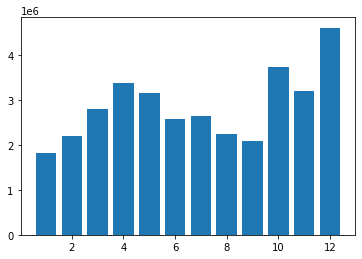

In [57]:
import matplotlib.pyplot as plt
months = range(1, 13)
plt.bar(months, results['Sales'])